In [4]:
#%pip install pulp
import pulp
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Donnez le nombre de sommets de votre graphe : 7
Donnez le nombre d'arêtes de votre graphe : 8
Veuillez saisir les éléments de la matrice d'incidence entre les sommets et les arêtes (séparés par des espaces) : 
1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
La matrice d'incidence est :  [[1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1]]
La matrice est TU (totalement unimodulaire)
[[0 1 0 1 0 0 0]
 [1 0 1 0 0 0 0]
 [0 1 0 1 0 1 0]
 [1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 1 0 1 0 1]
 [0 0 0 0 0 1 0]]
L'ensemble des sommets est : [0, 1, 2, 3, 4, 5, 6]
L'ensemble des arêtes est : [(0, 1), (0, 3), (1, 2), (2, 3), (2, 5), (3, 4), (4, 5), (5, 6)]
MinimumSetVertexCover:
MINIMIZE
1*x_0 + 1*x_1 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 0
SUBJECT TO
_C1: x_0 + x_1 >= 1

_C2: x_0 + x_3 >= 1

_C3: x_1 + x_2 >= 1

_C4: x_2 + x_3 >= 1

_C5: x_2 + x_5 >= 1



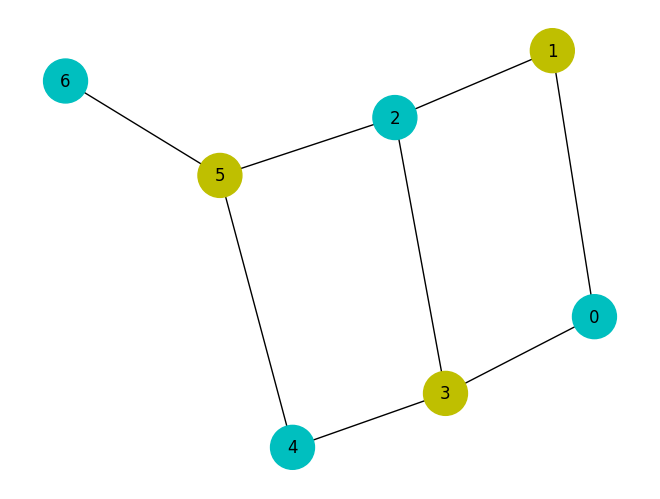

In [9]:
#Insertion des données du graphe

n=int(input("Donnez le nombre de sommets de votre graphe : "))
m=int(input("Donnez le nombre d'arêtes de votre graphe : "))
while(n<=0 or m<=0):
  if(n<=0):
    n=int(input("Veuillez donner un nombre strictement positif :"))
  if(m<=0):
    m=int(input("Veuillez donner un nombre strictement positif :"))


print("Veuillez saisir les éléments de la matrice d'incidence entre les sommets et les arêtes (séparés par des espaces) : ")
entries = list(map(int, input().split()))

# Pour afficher la matrice
incidence = np.array(entries).reshape(n, m)

#variable de vérification des éléments (soit des 0 soit des 1)
bin=0
for i in range(n):
  for j in range(m):
    if(incidence[i][j]!=0 and incidence[i][j]!=1):
      bin=1
      break
while(bin==1):
  print("Veuillez donner des éléments propres à une matrice d'incidence sommets arêtes (0 ou 1) :")
  entries = list(map(int, input().split()))
  incidence = np.array(entries).reshape(n, m)
  for i in range(n):
    for j in range(m):
      if(incidence[i][j]!=0 and incidence[i][j]!=1):
        bin=1
      else :
        bin=0
        break
print("La matrice d'incidence est : ",incidence)

#Test pour vérifier si la matrice est TU : totalement unimodulaire ou pas
tu=0
slice_list = [slice(k, l) for k in range(0, n) for l in range(k, m)]
results = [incidence[sl,sl] for sl in slice_list]
for i in range (len(results)):
    d=np.linalg.det(results[i])
    if((d!=0) and (d!=1) and (d!= -1)):
        tu=1
        break
if (tu==1):
  print("Erreur la matrice n'est pas TU (totalement unimodulaire), le problème ne se résoud pas")
else :
  print("La matrice est TU (totalement unimodulaire)")
  adjacence = (np.dot(incidence, incidence.T) > 0).astype(int)
  np.fill_diagonal(adjacence, 0)
  print(adjacence)
  G=nx.from_numpy_array(adjacence)
  print("L'ensemble des sommets est :",G.nodes)
  print("L'ensemble des arêtes est :",G.edges)

  #Résolution du problème à l'aide du solveur PULP

  # define the problem
  prob = pulp.LpProblem("MinimumSetVertexCover", pulp.LpMinimize)

  # define the variables
  x = pulp.LpVariable.dicts("x", G.nodes(), cat=pulp.LpBinary)
  z = pulp.LpVariable.dicts("z", G.edges(), cat=pulp.LpBinary)

  # define the objective function
  prob += pulp.lpSum(x)

  # define the constraints
  for (u,v) in G.edges():
    prob += x[u] + x[v] >= 1
  print(prob)
  # solve
  prob.solve()

  # display objective function value
  print("number of vertices in solution : ", prob.objective.value())
  print("La solution du problème")

  for v in G.nodes ():
    print(x[v],"=", pulp.value(x[v]))

  # display solution
  color_map = []
  for v in G.nodes():
     if pulp.value(x[v]) == 1.0 :
       print("node %s selected"%v)
       color_map.append('y')
     else :
      color_map.append('c')

  opt = {

    'node_size': 1000,
    'width': 1,
   }
  plt.figure(2)
  #Affichage de la solution
  nx.draw(G, node_color=color_map, with_labels=True, **opt)
  plt.savefig("Graph.png", format="PNG")
  plt.show()